In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
data=pd.read_csv('/content/TCS_stock_history.csv')
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


In [7]:
data['Date']=pd.to_datetime(data['Date'])
data.set_index('Date',inplace=True)

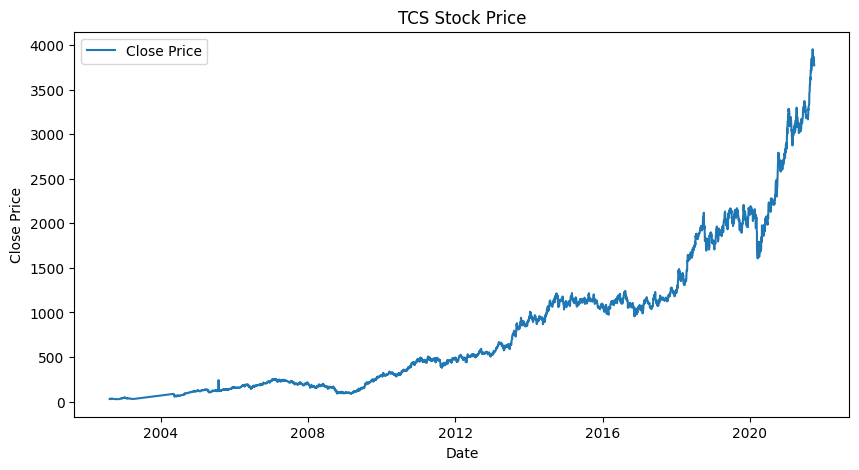

In [14]:
plt.figure(figsize=(10,5))
plt.plot(data['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('TCS Stock Price')
plt.legend()
plt.show()

In [17]:
#check for stationarity using adf
from statsmodels.tsa.stattools import adfuller
def adf_check(series):
    result=adfuller(series)
    print('ADF Statistic: %f' %result[0])
    print('p-value: %f' %result[1])
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is not  stationary")

adf_check(data['Close'])

ADF Statistic: 4.790100
p-value: 1.000000
Data is not  stationary


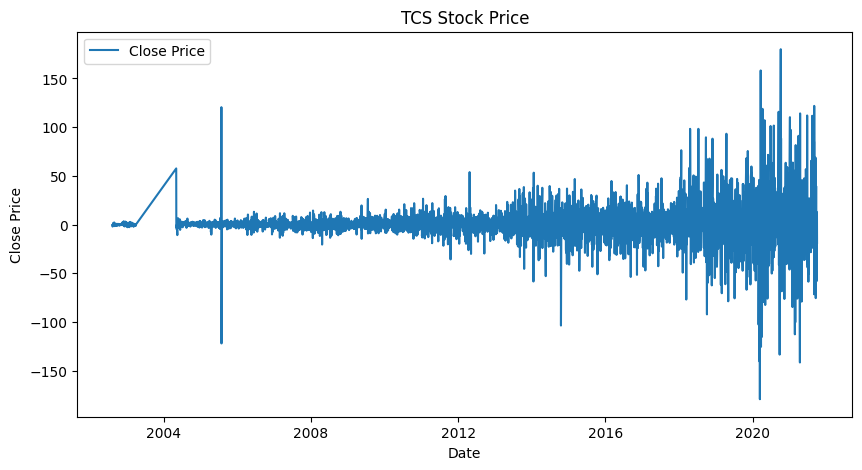

In [18]:
#make it stationary
data['Close_diff']=data['Close'].diff().dropna()
plt.figure(figsize=(10,5))
plt.plot(data['Close_diff'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('TCS Stock Price')
plt.legend()

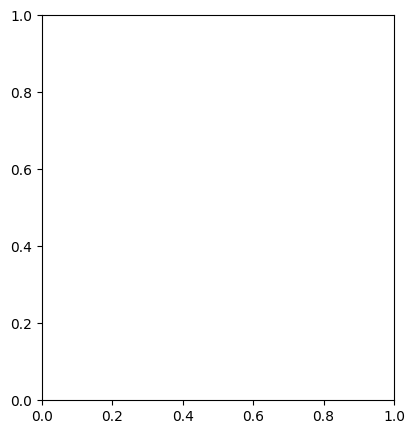

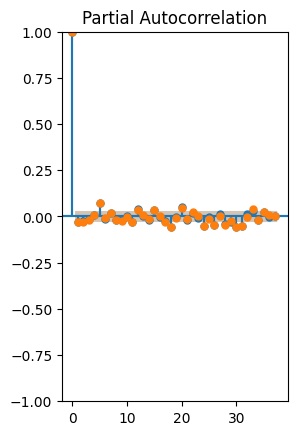

In [19]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plt.figure(figsize=(10,5))
plt.subplot(121)
plot_acf(data['Close'])
plt.subplot(122)
plot_acf(data['Close_diff'].dropna(), ax=plt.gca())
plt.subplot(122)
plot_pacf(data['Close_diff'].dropna(), ax=plt.gca())
plt.show()

In [38]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(data['Close'],order=(1,1,1))
model_fit=model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4463
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -19446.111
Date:                Fri, 11 Oct 2024   AIC                          38898.222
Time:                        06:10:37   BIC                          38917.432
Sample:                             0   HQIC                         38904.994
                               - 4463                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3440      0.159      2.162      0.031       0.032       0.656
ma.L1         -0.3779      0.157     -2.404      0.016      -0.686      -0.070
sigma2       357.2524      2.600    137.402      0.0

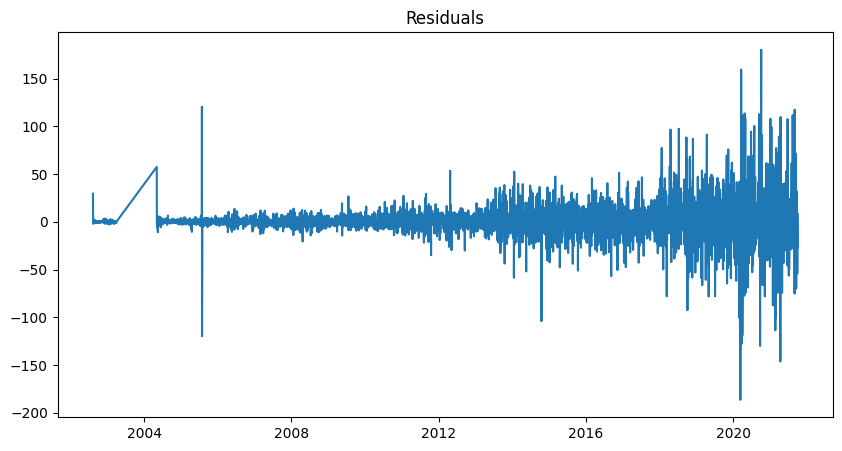

In [23]:
#plot residuals
residuals=model_fit.resid
plt.figure(figsize=(10,5))
plt.plot(model_fit.resid)
plt.title('Residuals')
plt.show()

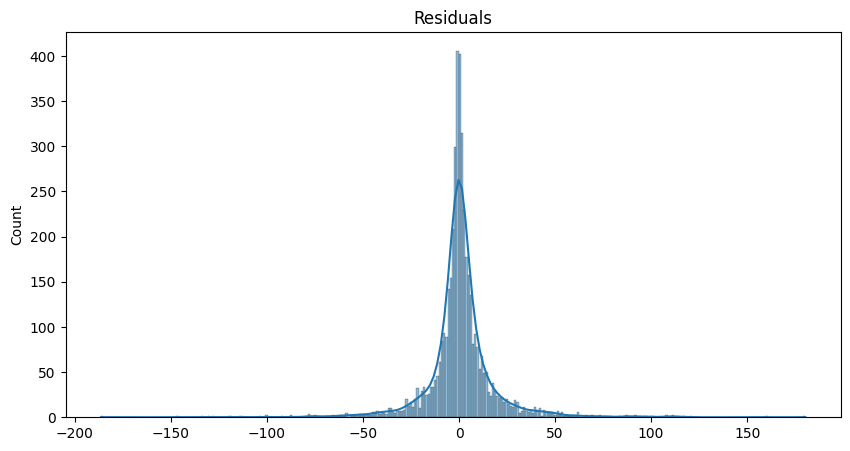

In [24]:
#normality checking
from statsmodels.graphics.gofplots import qqplot
plt.figure(figsize=(10,5))
sns.histplot(residuals, kde=True)
plt.title('Residuals')
plt.show()

In [47]:
forecast_steps=30
forecast_data=model_fit.forecast(steps=forecast_steps)

forecast_index = pd.date_range(start=data.index[1], periods=forecast_steps + 5, freq='D')[1:]
print(forecast_data)

4463    3774.010687
4464    3774.289549
4465    3774.385468
4466    3774.418460
4467    3774.429808
4468    3774.433711
4469    3774.435054
4470    3774.435515
4471    3774.435674
4472    3774.435729
4473    3774.435748
4474    3774.435754
4475    3774.435756
4476    3774.435757
4477    3774.435757
4478    3774.435758
4479    3774.435758
4480    3774.435758
4481    3774.435758
4482    3774.435758
4483    3774.435758
4484    3774.435758
4485    3774.435758
4486    3774.435758
4487    3774.435758
4488    3774.435758
4489    3774.435758
4490    3774.435758
4491    3774.435758
4492    3774.435758
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Text(0.5, 1.0, 'TCS Stock Price')

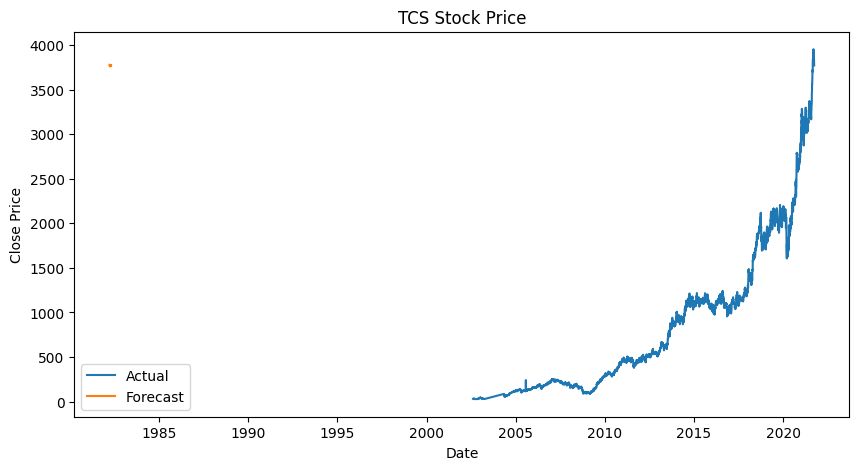

In [33]:
plt.figure(figsize=(10,5))
plt.plot(data['Close'], label='Actual')
plt.plot(forecast_data, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.title('TCS Stock Price')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


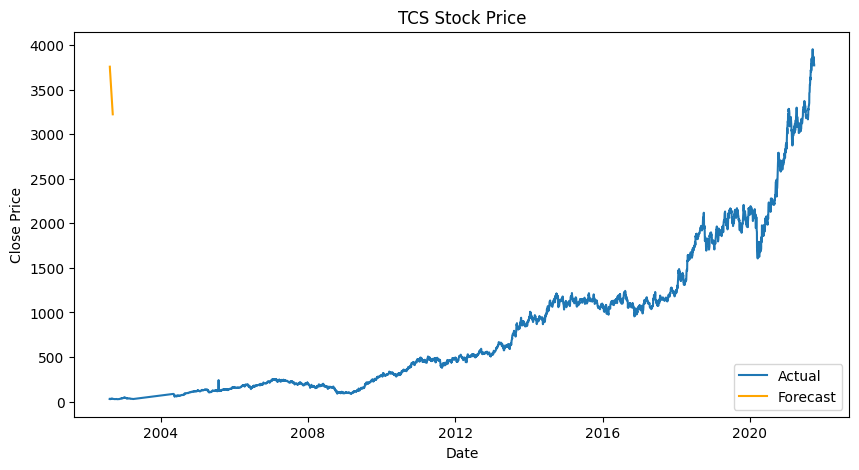

In [45]:
from pmdarima import auto_arima

# Automatically find the best p, d, q
model_auto = auto_arima(data['Close'], seasonal=False, stepwise=True, suppress_warnings=True)
forecast = model_auto.predict(n_periods=30)

# Create the new plot with actual and forecasted values
plt.figure(figsize=(10,5))
plt.plot(data.index, data['Close'], label="Actual")
#forecast_index is created with 30 + 5 periods and forecast only has 30 periods
#the following line slices forecast_index to match the length of forecast
plt.plot(forecast_index[:len(forecast)], forecast, label="Forecast", color='orange')
plt.title('TCS Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(data['Close'][-forecast_steps:], forecast_data)
print('Mean Squared Error:', mse)

Mean Squared Error: 10387.32092606849


In [35]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(data['Close'][-forecast_steps:], forecast_data)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 83.60957083516088
